In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.renderers.default = 'iframe'

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X 

In [5]:
GD_model = SGDRegressor(max_iter=1, eta0=0.0001, warm_start=True)

In [6]:
out = []

for i in range(100):
    GD_model.fit(X, y) # Singel itteration of GD
    out.append([
                i, GD_model.coef_[0], # Model Parameter (1)
                GD_model.intercept_[0], # Model Parameter (2)
                mean_squared_error(y, GD_model.predict(X))
                ])
    
    df = pd.DataFrame(out, columns=["itteration", "m", "b", "MSE"])
    _out = out[-1]
    print(f"Itteration Number: {_out[0]}, Param (1): {_out[1]}, Param (2): {_out[2]}, MSE: {_out[3]}")
    
    # input()
    # break

Itteration Number: 0, Param (1): 0.1855690386186557, Param (2): 0.16162356322720833, MSE: 47.12565745695154
Itteration Number: 1, Param (1): 0.3596709389900003, Param (2): 0.3146177480664859, MSE: 42.538781425457856
Itteration Number: 2, Param (1): 0.5263338914568241, Param (2): 0.4604815310753811, MSE: 38.37581179362888
Itteration Number: 3, Param (1): 0.6826017966368363, Param (2): 0.598744215428391, MSE: 34.65083614516174
Itteration Number: 4, Param (1): 0.8334402507166679, Param (2): 0.7308068433934722, MSE: 31.251611762097273
Itteration Number: 5, Param (1): 0.9742334597309531, Param (2): 0.8556946371481643, MSE: 28.221092113087487
Itteration Number: 6, Param (1): 1.1082501014587147, Param (2): 0.9747632898877447, MSE: 25.478861285882516
Itteration Number: 7, Param (1): 1.2394997047390381, Param (2): 1.0889146789634074, MSE: 22.952870920455943
Itteration Number: 8, Param (1): 1.3624504096218064, Param (2): 1.1968962914766328, MSE: 20.697708896741403
Itteration Number: 9, Param (1)

In [7]:
df

,itteration,m,b,MSE
0,0,0.185569,0.161624,47.125657
1,1,0.359671,0.314618,42.538781
2,2,0.526334,0.460482,38.375812
3,3,0.682602,0.598744,34.650836
4,4,0.833440,0.730807,31.251612
...,...,...,...,...
95,95,3.484372,3.371693,0.100168
96,96,3.483865,3.375088,0.099190
97,97,3.483231,3.378292,0.098274
98,98,3.482524,3.381481,0.097371


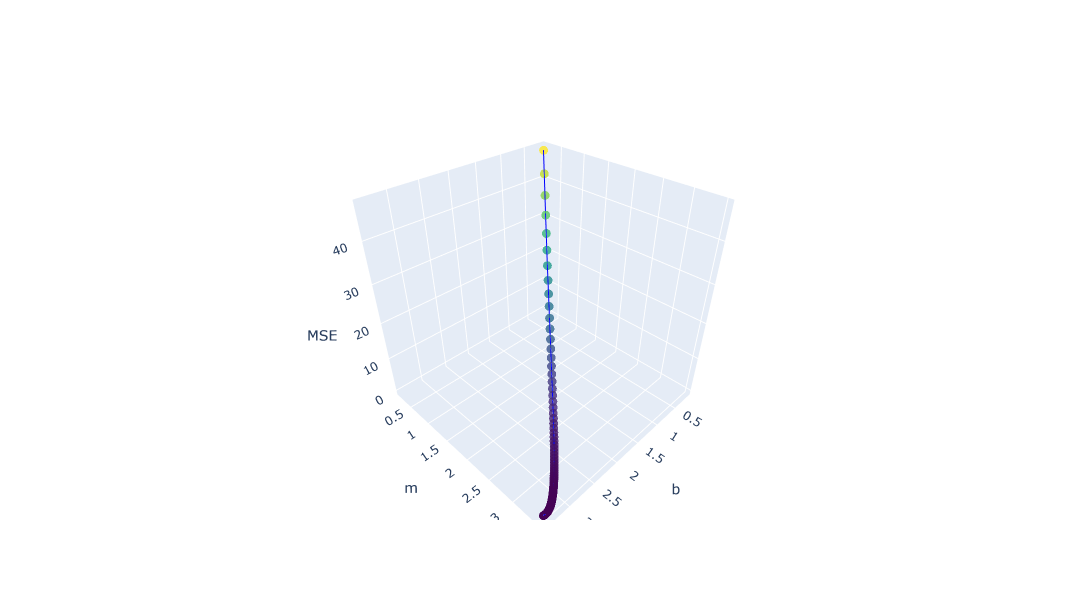

In [8]:
init_notebook_mode(connected=True)

trace = go.Scatter3d(
    x=df['b'],
    y=df['m'],
    z=df['MSE'],
    mode='lines+markers',
    marker=dict(size=5, color=df['MSE'], colorscale='Viridis', opacity=0.8),
    line=dict(color='blue', width=2)
)

layout = go.Layout(
    title='',
    scene=dict(
        xaxis=dict(title='b'),
        yaxis=dict(title='m'),
        zaxis=dict(title='MSE')
    ),
    width=800,
    height=600
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)